In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') 
plt.style.use('seaborn-paper') 
plt.style.use('seaborn-whitegrid') 


In [170]:
inla_res = pd.read_csv('inla_results.txt',index_col=0,header=0,names=['p','r','inla_mean','inla_lci','inla_uci'])
jolly_res = pd.read_csv('jolly_results.txt',header=0,names=['p','r','true','jolly_mean','jolly_mean_frac','jolly_lci','jolly_lci_frac','jolly_uci','jolly_uci_frac','.'])
multi_res = pd.read_csv('multifield_results.txt',header=0,names=['p','r','true','multi_mean','multi_mean_frac','multi_lci','multi_lci_frac','multi_uci','multi_uci_frac','..'])

In [171]:
df = multi_res.merge(inla_res,on=['p','r'])
df = df.merge(jolly_res,on=['true','p','r'])


In [172]:
df['inla_diff']=df.inla_mean/df.true
df['jolly_diff']=df.jolly_mean/df.true
df['multi_diff']=df.multi_mean/df.true

df['inla_lci_diff']=df.inla_lci/df.true
df['jolly_lci_diff']=df.jolly_lci/df.true
df['multi_lci_diff']=df.multi_lci/df.true

df['inla_uci_diff']=df.inla_uci/df.true
df['jolly_uci_diff']=df.jolly_uci/df.true
df['multi_uci_diff']=df.multi_uci/df.true



In [173]:
#dfnew[dfnew.p==9]

In [180]:
dfmultibox = pd.DataFrame(data={'p':np.hstack((df.p.values,df.p.values,df.p.values)),'counts':np.hstack((df.multi_lci_diff.values,df.multi_diff.values,df.multi_uci_diff.values)),'cat':np.hstack((np.array(['LCI']*100),np.array(['Estimate']*100),np.array(['UCI']*100)))})
dfjollybox = pd.DataFrame(data={'p':np.hstack((df.p.values,df.p.values,df.p.values)),'counts':np.hstack((df.jolly_lci_diff.values,df.jolly_diff.values,df.jolly_uci_diff.values)),'cat':np.hstack((np.array(['LCI']*100),np.array(['Estimate']*100),np.array(['UCI']*100)))})
dfinlabox = pd.DataFrame(data={'p':np.hstack((df.p.values,df.p.values,df.p.values)),'counts':np.hstack((df.inla_lci_diff.values,df.inla_diff.values,df.inla_uci_diff.values)),'cat':np.hstack((np.array(['LCI']*100),np.array(['Estimate']*100),np.array(['UCI']*100)))})

In [181]:

#dfnew

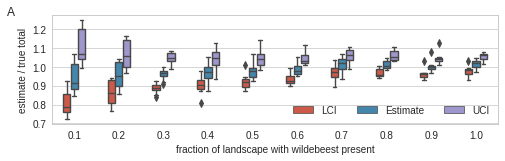

In [194]:

plt.figure(figsize=(8,2))
ax =sns.boxplot(x=dfmultibox.p/10,y=dfmultibox.counts,hue=dfmultibox.cat,width=0.5,palette=['C0','C1','C2'])
# sns.boxplot(x=df.p,y=df.multi_lci_diff,width=0.3,color='C1')
# sns.boxplot(x=df.p,y=df.multi_uci_diff,width=0.3,color='C2')
plt.ylabel('estimate / true total',size=10)
plt.xlabel('fraction of landscape with wildebeest present',size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='lower right',fontsize=10,ncol=3)
plt.text(-0.1,1,'A', size=12, transform=ax.transAxes)
plt.savefig("multi_field.pdf",bbox_inches='tight')

plt.show()



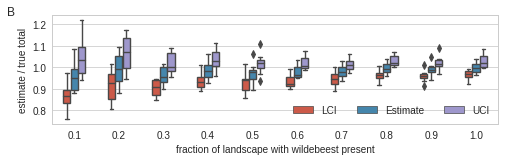

In [195]:
plt.figure(figsize=(8,2))
ax = sns.boxplot(x=dfjollybox.p/10,y=dfjollybox.counts,hue=dfjollybox.cat,width=0.5,palette=['C0','C1','C2'])
# sns.boxplot(x=df.p,y=df.multi_lci_diff,width=0.3,color='C1')
# sns.boxplot(x=df.p,y=df.multi_uci_diff,width=0.3,color='C2')
plt.ylabel('estimate / true total',size=10)
plt.xlabel('fraction of landscape with wildebeest present',size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='lower right',fontsize=10,ncol=3)
#plt.text('B')
plt.text(-0.1,1,'B', size=12, transform=ax.transAxes)
plt.savefig("jolly.pdf",bbox_inches='tight')

plt.show()


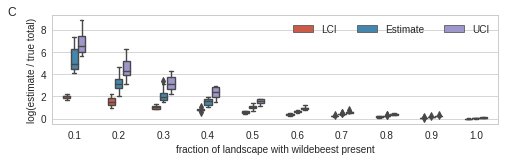

In [198]:
plt.figure(figsize=(8,2))
ax = sns.boxplot(x=dfinlabox.p/10,y=np.log(dfinlabox.counts),hue=dfinlabox.cat,width=0.5,palette=['C0','C1','C2'])
# sns.boxplot(x=df.p,y=df.multi_lci_diff,width=0.3,color='C1')
# sns.boxplot(x=df.p,y=df.multi_uci_diff,width=0.3,color='C2')
plt.ylabel('log(estimate / true total)',size=10)
plt.xlabel('fraction of landscape with wildebeest present',size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right',fontsize=10,ncol=3)
plt.text(-0.1,1,'C', size=12, transform=ax.transAxes)
plt.savefig("single_field.pdf",bbox_inches='tight')
plt.show()


In [142]:
df['multi_in_bounds']=(((df.multi_uci>df.true)&(df.multi_lci<df.true)).values).astype(np.int32)

In [143]:
df['jolly_in_bounds']=(((df.jolly_uci>df.true)&(df.jolly_lci<df.true)).values).astype(np.int32)

In [144]:
df['inla_in_bounds']=(((df.inla_uci>df.true)&(df.inla_lci<df.true)).values).astype(np.int32)

In [146]:
dfinbounds = df.groupby('p').sum()

In [156]:
dfinbounds
np.hstack((dfinbounds.index.values,dfinbounds.index.values,dfinbounds.index.values)).shape
np.hstack((dfinbounds.multi_in_bounds.values,dfinbounds.jolly_in_bounds.values,dfinbounds.inla_in_bounds.values)).shape
np.hstack((np.array(['Two-field']*100),np.array(['Jolly']*100),np.array(['Single field']*100))).shape

(300,)

In [157]:
dfboundsbar = pd.DataFrame(data={'p':np.hstack((dfinbounds.index.values,dfinbounds.index.values,dfinbounds.index.values)),'inbounds':np.hstack((dfinbounds.multi_in_bounds.values,dfinbounds.jolly_in_bounds.values,dfinbounds.inla_in_bounds.values)),'method':np.hstack((np.array(['Two-field']*10),np.array(['Jolly']*10),np.array(['Single field']*10)))})


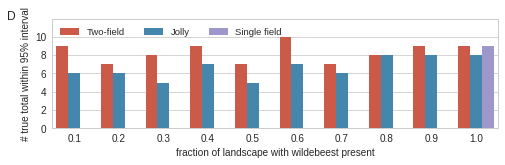

In [203]:
plt.figure(figsize=(8,2))
ax = sns.barplot(x=dfboundsbar.p/10,y=dfboundsbar.inbounds,hue=dfboundsbar.method,palette=['C0','C1','C2'])
# sns.boxplot(x=df.p,y=df.multi_lci_diff,width=0.3,color='C1')
# sns.boxplot(x=df.p,y=df.multi_uci_diff,width=0.3,color='C2')
plt.ylabel('# true total within 95% interval',size=10)
plt.xlabel('fraction of landscape with wildebeest present',size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper left',fontsize=9.5,ncol=3)
#plt.text('B')
plt.ylim(0,11.9)
plt.text(-0.1,1,'D', size=12, transform=ax.transAxes)
plt.savefig("bounds.pdf",bbox_inches='tight')

plt.show()

(-120000.0, 120000.0)

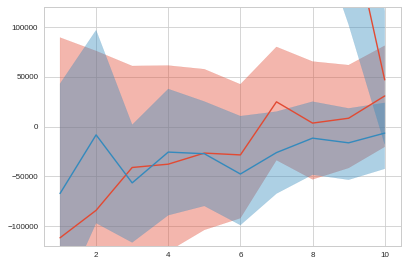

In [71]:
plt.plot(dfmean.index.values,dfmean.multi_diff,c='C0')
plt.fill_between(dfmean.index.values,dfmean.multi_lci_diff,dfmean.multi_uci_diff,alpha=0.4,color='C0')
plt.plot(dfmean.index.values,dfmean.jolly_diff,c='C1')
plt.fill_between(dfmean.index.values,dfmean.jolly_lci_diff,dfmean.jolly_uci_diff,alpha=0.4,color='C1')

plt.plot(dfmean.index.values,dfmean.inla_diff)
plt.fill_between(dfmean.index.values,dfmean.inla_lci_diff,dfmean.inla_uci_diff,alpha=0.4,color='C1')

plt.ylim(-120000,120000)
# plt.plot(dfmean.p.values,df.jolly_mean.values-df.true.values,'.')
# plt.plot(dfmean.p.values,df.inla_mean.values-df.true.values,'.')

In [51]:
dfmean.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='p')